In [1]:
import ROOT
import numpy as np
from array import array
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem

Welcome to JupyROOT 6.26/06


In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/physics_lists_comp
%ls

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/physics_lists_comp
dETdeta_analysis_23727_no_hot_towers_nozs_mc_noweight_0-90_ftfp_bert_hp.root
dETdeta_analysis_23727_no_hot_towers_nozs_mc_noweight_0-90_ftfp_bert.root
dETdeta_analysis_23727_no_hot_towers_nozs_mc_noweight_0-90_qgsp_bert_hp.root
dETdeta_analysis_23727_no_hot_towers_nozs_mc_noweight_0-90_qsgp_bert_hp.root
dETdeta_analysis_23727_no_hot_towers_skip_event_on_no_vz_cut_nozs_mc_noweight_0-90_ftfp_bert_hp.root
dETdeta_analysis_23727_no_hot_towers_skip_event_on_no_vz_cut_nozs_mc_noweight_0-90_ftfp_bert.root
dETdeta_analysis_23727_no_hot_towers_skip_event_on_no_vz_cut_nozs_mc_noweight_0-90_qgsp_bert_hp.root
dETdeta_analysis_23727_no_hot_towers_skip_event_on_nozs_mc_reweight_0-90_ftfp_bert_hp.root
dETdeta_analysis_23727_no_hot_towers_skip_event_on_nozs_mc_reweight_0-90_ftfp_bert.root
dETdeta_analysis_23727_no_hot_towers_skip_event_on_nozs_mc_reweight_0-90_qgsp_bert_hp.root
dETdeta_analysis.C
dETdeta_variation_ph

In [4]:
f1 = ROOT.TFile.Open("dETdeta_analysis_23727_no_hot_towers_skip_event_on_no_vz_cut_nozs_mc_noweight_0-90_ftfp_bert.root")
h_2D_sim_emcal = TH2F(f1.Get("h_2D_emcal_calibT"))
h_2D_sim_ihcal = TH2F(f1.Get("h_2D_ihcal_calibT"))
h_2D_sim_ohcal = TH2F(f1.Get("h_2D_ohcal_calibT"))
h_2D_sim_emcal.SetDirectory(0)
h_2D_sim_ihcal.SetDirectory(0)
h_2D_sim_ohcal.SetDirectory(0)
f1.Close()
f3 = ROOT.TFile.Open("dETdeta_analysis_23727_no_hot_towers_skip_event_on_no_vz_cut_nozs_mc_noweight_0-90_ftfp_bert_hp.root")
h_2D_epos_emcal = TH2F(f3.Get("h_2D_emcal_calibT"))
h_2D_epos_ihcal = TH2F(f3.Get("h_2D_ihcal_calibT"))
h_2D_epos_ohcal = TH2F(f3.Get("h_2D_ohcal_calibT"))
h_2D_epos_emcal.SetDirectory(0)
h_2D_epos_ihcal.SetDirectory(0)
h_2D_epos_ohcal.SetDirectory(0)
f3.Close()
f4 = ROOT.TFile.Open("dETdeta_analysis_23727_no_hot_towers_skip_event_on_no_vz_cut_nozs_mc_noweight_0-90_qgsp_bert_hp.root")
h_2D_ampt_emcal = TH2F(f4.Get("h_2D_emcal_calibT"))
h_2D_ampt_ihcal = TH2F(f4.Get("h_2D_ihcal_calibT"))
h_2D_ampt_ohcal = TH2F(f4.Get("h_2D_ohcal_calibT"))
h_2D_ampt_emcal.SetDirectory(0)
h_2D_ampt_ihcal.SetDirectory(0)
h_2D_ampt_ohcal.SetDirectory(0)
f4.Close()

In [5]:
h_1D_sim_emcal = h_2D_sim_emcal.ProjectionX("h_1D_sim_emcal",1,256)
h_1D_epos_emcal = h_2D_epos_emcal.ProjectionX("h_1D_epos_emcal",1,256)
h_1D_ampt_emcal = h_2D_ampt_emcal.ProjectionX("h_1D_ampt_emcal",1,256)
h_1D_sim_emcal.Rebin(4)
h_1D_sim_emcal.Scale(1.0/0.09167)
h_1D_epos_emcal.Rebin(4)
h_1D_epos_emcal.Scale(1.0/0.09167)
h_1D_ampt_emcal.Rebin(4)
h_1D_ampt_emcal.Scale(1.0/0.09167)
h_1D_sim_ihcal = h_2D_sim_ihcal.ProjectionX("h_1D_sim_ihcal",1,256)
h_1D_epos_ihcal = h_2D_epos_ihcal.ProjectionX("h_1D_epos_ihcal",1,256)
h_1D_ampt_ihcal = h_2D_ampt_ihcal.ProjectionX("h_1D_ampt_ihcal",1,256)
h_1D_sim_ihcal.Scale(1.0/0.09167)
h_1D_epos_ihcal.Scale(1.0/0.09167)
h_1D_ampt_ihcal.Scale(1.0/0.09167)
h_1D_sim_ohcal = h_2D_sim_ohcal.ProjectionX("h_1D_sim_ohcal",1,256)
h_1D_epos_ohcal = h_2D_epos_ohcal.ProjectionX("h_1D_epos_ohcal",1,256)
h_1D_ampt_ohcal = h_2D_ampt_ohcal.ProjectionX("h_1D_ampt_ohcal",1,256)
h_1D_sim_ohcal.Scale(1.0/0.09167)
h_1D_epos_ohcal.Scale(1.0/0.09167)
h_1D_ampt_ohcal.Scale(1.0/0.09167)

In [6]:
h_eT_sim_emcal = TH1F("h_eT_sim_emcal","",24,0,24)
h_eT_epos_emcal = TH1F("h_eT_epos_emcal","",24,0,24)
h_eT_ampt_emcal = TH1F("h_eT_ampt_emcal","",24,0,24)
h_eT_sim_calo = TH1F("h_eT_sim_calo","",24,0,24)
h_eT_epos_calo = TH1F("h_eT_epos_calo","",24,0,24)
h_eT_ampt_calo = TH1F("h_eT_ampt_calo","",24,0,24)
for i in range(1, h_1D_sim_emcal.GetNbinsX() + 1):
    h_eT_sim_emcal.SetBinContent(i, h_1D_sim_emcal.GetBinContent(i))
    h_eT_epos_emcal.SetBinContent(i, h_1D_epos_emcal.GetBinContent(i))
    h_eT_ampt_emcal.SetBinContent(i, h_1D_ampt_emcal.GetBinContent(i))
    h_eT_sim_emcal.SetBinError(i, h_1D_sim_emcal.GetBinError(i))
    h_eT_epos_emcal.SetBinError(i, h_1D_epos_emcal.GetBinError(i))
    h_eT_ampt_emcal.SetBinError(i, h_1D_ampt_emcal.GetBinError(i))
    h_eT_sim_calo.SetBinContent(i, h_1D_sim_emcal.GetBinContent(i))
    h_eT_epos_calo.SetBinContent(i, h_1D_epos_emcal.GetBinContent(i))
    h_eT_ampt_calo.SetBinContent(i, h_1D_ampt_emcal.GetBinContent(i))
    h_eT_sim_calo.SetBinError(i, h_1D_sim_emcal.GetBinError(i))
    h_eT_epos_calo.SetBinError(i, h_1D_epos_emcal.GetBinError(i))
    h_eT_ampt_calo.SetBinError(i, h_1D_ampt_emcal.GetBinError(i))

In [7]:
h_eT_sim_ihcal = TH1F("h_eT_sim_ihcal","",24,0,24)
h_eT_epos_ihcal = TH1F("h_eT_epos_ihcal","",24,0,24)
h_eT_ampt_ihcal = TH1F("h_eT_ampt_ihcal","",24,0,24)
h_eT_sim_hcal = TH1F("h_eT_sim_hcal","",24,0,24)
h_eT_epos_hcal = TH1F("h_eT_epos_hcal","",24,0,24)
h_eT_ampt_hcal = TH1F("h_eT_ampt_hcal","",24,0,24)
for i in range(1, h_1D_sim_ihcal.GetNbinsX() + 1):
    h_eT_sim_ihcal.SetBinContent(i, h_1D_sim_ihcal.GetBinContent(i))
    h_eT_epos_ihcal.SetBinContent(i, h_1D_epos_ihcal.GetBinContent(i))
    h_eT_ampt_ihcal.SetBinContent(i, h_1D_ampt_ihcal.GetBinContent(i))
    h_eT_sim_ihcal.SetBinError(i, h_1D_sim_ihcal.GetBinError(i))
    h_eT_epos_ihcal.SetBinError(i, h_1D_epos_ihcal.GetBinError(i))
    h_eT_ampt_ihcal.SetBinError(i, h_1D_ampt_ihcal.GetBinError(i))
    h_eT_sim_hcal.SetBinContent(i, h_1D_sim_ihcal.GetBinContent(i))
    h_eT_epos_hcal.SetBinContent(i, h_1D_epos_ihcal.GetBinContent(i))
    h_eT_ampt_hcal.SetBinContent(i, h_1D_ampt_ihcal.GetBinContent(i))
    h_eT_sim_hcal.SetBinError(i, h_1D_sim_ihcal.GetBinError(i))
    h_eT_epos_hcal.SetBinError(i, h_1D_epos_ihcal.GetBinError(i))
    h_eT_ampt_hcal.SetBinError(i, h_1D_ampt_ihcal.GetBinError(i))
    h_eT_sim_calo.SetBinContent(i, h_eT_sim_calo.GetBinContent(i) + h_1D_sim_ihcal.GetBinContent(i))
    h_eT_epos_calo.SetBinContent(i, h_eT_epos_calo.GetBinContent(i) + h_1D_epos_ihcal.GetBinContent(i))
    h_eT_ampt_calo.SetBinContent(i, h_eT_ampt_calo.GetBinContent(i) + h_1D_ampt_ihcal.GetBinContent(i))
    h_eT_sim_calo.SetBinError(i, h_eT_sim_calo.GetBinError(i) + h_1D_sim_ihcal.GetBinError(i))
    h_eT_epos_calo.SetBinError(i, h_eT_epos_calo.GetBinError(i) + h_1D_epos_ihcal.GetBinError(i))
    h_eT_ampt_calo.SetBinError(i, h_eT_ampt_calo.GetBinError(i) + h_1D_ampt_ihcal.GetBinError(i))
h_eT_sim_ohcal = TH1F("h_eT_sim_ohcal","",24,0,24)
h_eT_epos_ohcal = TH1F("h_eT_epos_ohcal","",24,0,24)
h_eT_ampt_ohcal = TH1F("h_eT_ampt_ohcal","",24,0,24)
for i in range(1, h_1D_sim_ohcal.GetNbinsX() + 1):
    h_eT_sim_ohcal.SetBinContent(i, h_1D_sim_ohcal.GetBinContent(i))
    h_eT_epos_ohcal.SetBinContent(i, h_1D_epos_ohcal.GetBinContent(i))
    h_eT_ampt_ohcal.SetBinContent(i, h_1D_ampt_ohcal.GetBinContent(i))
    h_eT_sim_ohcal.SetBinError(i, h_1D_sim_ohcal.GetBinError(i))
    h_eT_epos_ohcal.SetBinError(i, h_1D_epos_ohcal.GetBinError(i))
    h_eT_ampt_ohcal.SetBinError(i, h_1D_ampt_ohcal.GetBinError(i))
    h_eT_sim_hcal.SetBinContent(i, h_eT_sim_hcal.GetBinContent(i) + h_1D_sim_ohcal.GetBinContent(i))
    h_eT_epos_hcal.SetBinContent(i, h_eT_epos_hcal.GetBinContent(i) + h_1D_epos_ohcal.GetBinContent(i))
    h_eT_ampt_hcal.SetBinContent(i, h_eT_ampt_hcal.GetBinContent(i) + h_1D_ampt_ohcal.GetBinContent(i))
    h_eT_sim_hcal.SetBinError(i, h_eT_sim_hcal.GetBinError(i) + h_1D_sim_ohcal.GetBinError(i))
    h_eT_epos_hcal.SetBinError(i, h_eT_epos_hcal.GetBinError(i) + h_1D_epos_ohcal.GetBinError(i))
    h_eT_ampt_hcal.SetBinError(i, h_eT_ampt_hcal.GetBinError(i) + h_1D_ampt_ohcal.GetBinError(i))
    h_eT_sim_calo.SetBinContent(i, h_eT_sim_calo.GetBinContent(i) + h_1D_sim_ohcal.GetBinContent(i))
    h_eT_epos_calo.SetBinContent(i, h_eT_epos_calo.GetBinContent(i) + h_1D_epos_ohcal.GetBinContent(i))
    h_eT_ampt_calo.SetBinContent(i, h_eT_ampt_calo.GetBinContent(i) + h_1D_ampt_ohcal.GetBinContent(i))
    h_eT_sim_calo.SetBinError(i, h_eT_sim_calo.GetBinError(i) + h_1D_sim_ohcal.GetBinError(i))
    h_eT_epos_calo.SetBinError(i, h_eT_epos_calo.GetBinError(i) + h_1D_epos_ohcal.GetBinError(i))
    h_eT_ampt_calo.SetBinError(i, h_eT_ampt_calo.GetBinError(i) + h_1D_ampt_ohcal.GetBinError(i))

In [8]:
emcal_ratio_epos = TH1F(h_eT_epos_emcal.Clone("emcal_ratio_epos"))
emcal_ratio_epos.Divide(h_eT_sim_emcal)
emcal_ratio_ampt = TH1F(h_eT_ampt_emcal.Clone("emcal_ratio_ampt"))
emcal_ratio_ampt.Divide(h_eT_sim_emcal)
emcal_ratio_hp = TH1F(h_eT_ampt_emcal.Clone("emcal_ratio_hp"))
emcal_ratio_hp.Divide(h_eT_epos_emcal)

True

In [9]:
ihcal_ratio_epos = TH1F(h_eT_epos_ihcal.Clone("ihcal_ratio_epos"))
ihcal_ratio_epos.Divide(h_eT_sim_ihcal)
ihcal_ratio_ampt = TH1F(h_eT_ampt_ihcal.Clone("ihcal_ratio_ampt"))
ihcal_ratio_ampt.Divide(h_eT_sim_ihcal)
ihcal_ratio_hp = TH1F(h_eT_ampt_ihcal.Clone("ihcal_ratio_hp"))
ihcal_ratio_hp.Divide(h_eT_epos_ihcal)

ohcal_ratio_epos = TH1F(h_eT_epos_ohcal.Clone("ohcal_ratio_epos"))
ohcal_ratio_epos.Divide(h_eT_sim_ohcal)
ohcal_ratio_ampt = TH1F(h_eT_ampt_ohcal.Clone("ohcal_ratio_ampt"))
ohcal_ratio_ampt.Divide(h_eT_sim_ohcal)
ohcal_ratio_hp = TH1F(h_eT_ampt_ohcal.Clone("ohcal_ratio_hp"))
ohcal_ratio_hp.Divide(h_eT_epos_ohcal)

hcal_ratio_epos = TH1F(h_eT_epos_hcal.Clone("hcal_ratio_epos"))
hcal_ratio_epos.Divide(h_eT_sim_hcal)
hcal_ratio_ampt = TH1F(h_eT_ampt_hcal.Clone("hcal_ratio_ampt"))
hcal_ratio_ampt.Divide(h_eT_sim_hcal)
hcal_ratio_hp = TH1F(h_eT_ampt_hcal.Clone("hcal_ratio_hp"))
hcal_ratio_hp.Divide(h_eT_epos_hcal)

calo_ratio_epos = TH1F(h_eT_epos_calo.Clone("calo_ratio_epos"))
calo_ratio_epos.Divide(h_eT_sim_calo)
calo_ratio_ampt = TH1F(h_eT_ampt_calo.Clone("calo_ratio_ampt"))
calo_ratio_ampt.Divide(h_eT_sim_calo)
calo_ratio_hp = TH1F(h_eT_ampt_calo.Clone("calo_ratio_hp"))
calo_ratio_hp.Divide(h_eT_epos_calo)

True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_reco_w_ratio_epos_mb_phys_list_comp.png has been created


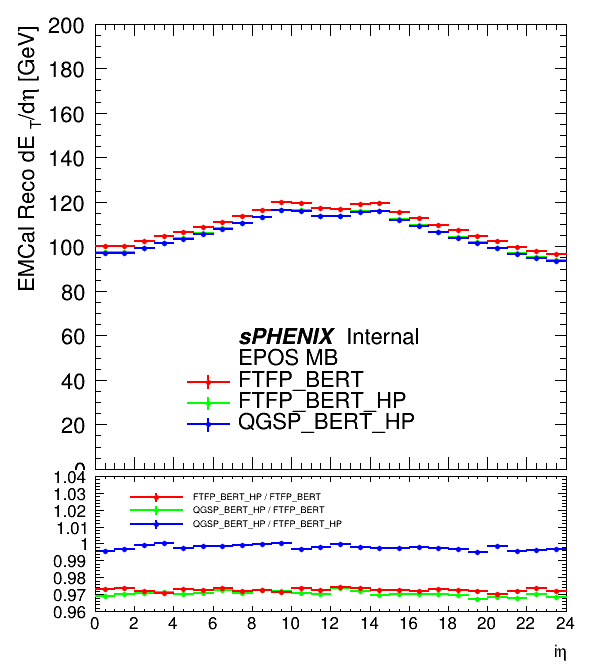

In [41]:
canvas = TCanvas("canvas","",600,700)

pad_top = ROOT.TPad("pad_top", "", 0.0, 0.28, 1.0, 1.0)
pad_top.SetBottomMargin(0.03)
pad_top.Draw()
pad_top.cd()

leg = ROOT.TLegend(.3,.1,.7,.32)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","EPOS MB","")
leg.AddEntry(h_eT_sim_emcal,"FTFP_BERT","lep")
leg.AddEntry(h_eT_epos_emcal,"FTFP_BERT_HP","lep")
leg.AddEntry(h_eT_ampt_emcal,"QGSP_BERT_HP","lep")
leg.SetBorderSize(0)
h_eT_sim_emcal.SetLineColor(2)
h_eT_ampt_emcal.SetLineColor(4)
h_eT_epos_emcal.SetLineColor(3)
h_eT_sim_emcal.SetMarkerStyle(8)
h_eT_sim_emcal.SetMarkerSize(0.7)
h_eT_sim_emcal.SetMarkerColor(2)
h_eT_ampt_emcal.SetMarkerStyle(8)
h_eT_ampt_emcal.SetMarkerSize(0.7)
h_eT_ampt_emcal.SetMarkerColor(4)
h_eT_epos_emcal.SetMarkerStyle(8)
h_eT_epos_emcal.SetMarkerSize(0.7)
h_eT_epos_emcal.SetMarkerColor(3)
h_eT_epos_emcal.GetYaxis().SetRangeUser(0,200)
h_eT_sim_emcal.SetStats(0)
h_eT_epos_emcal.SetStats(0)
h_eT_ampt_emcal.SetStats(0)
h_eT_epos_emcal.SetYTitle("EMCal Reco dE_{T}/d#eta [GeV]")
h_eT_epos_emcal.SetXTitle("#eta")
h_eT_epos_emcal.Draw()
h_eT_sim_emcal.Draw('same')
h_eT_ampt_emcal.Draw('same')
leg.Draw()

canvas.cd()
pad_bottom = ROOT.TPad("pad_bottom", "", 0.0, 0.0, 1.0, 0.3)
pad_bottom.SetTopMargin(0.03)
pad_bottom.SetBottomMargin(0.3)
pad_bottom.Draw()
pad_bottom.cd()

leg1 = ROOT.TLegend(.2,.7,.7,.9)
leg1.AddEntry(emcal_ratio_epos,"FTFP_BERT_HP / FTFP_BERT","lep")
leg1.AddEntry(emcal_ratio_ampt,"QGSP_BERT_HP / FTFP_BERT","lep")
leg1.AddEntry(emcal_ratio_hp,"QGSP_BERT_HP / FTFP_BERT_HP","lep")
leg1.SetBorderSize(0)
emcal_ratio_hp.GetXaxis().SetLabelSize(0.09)
emcal_ratio_hp.GetYaxis().SetLabelSize(0.09)
emcal_ratio_epos.SetLineColor(2)
emcal_ratio_ampt.SetLineColor(3)
emcal_ratio_hp.SetLineColor(4)
emcal_ratio_epos.SetMarkerStyle(8)
emcal_ratio_epos.SetMarkerSize(0.7)
emcal_ratio_epos.SetMarkerColor(2)
emcal_ratio_ampt.SetMarkerStyle(8)
emcal_ratio_ampt.SetMarkerSize(0.7)
emcal_ratio_ampt.SetMarkerColor(3)
emcal_ratio_hp.SetMarkerStyle(8)
emcal_ratio_hp.SetMarkerSize(0.7)
emcal_ratio_hp.SetMarkerColor(4)
emcal_ratio_hp.GetYaxis().SetRangeUser(0.96,1.04)
emcal_ratio_epos.SetStats(0)
emcal_ratio_ampt.SetStats(0)
emcal_ratio_hp.SetYTitle("")
emcal_ratio_hp.GetXaxis().SetTitle("i#eta")
emcal_ratio_hp.GetXaxis().SetTitleSize(0.09)
emcal_ratio_hp.Draw()
emcal_ratio_ampt.Draw('same')
emcal_ratio_epos.Draw('same')
leg1.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_reco_w_ratio_epos_mb_phys_list_comp.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/ihcal_reco_w_ratio_epos_mb_phys_list_comp.png has been created


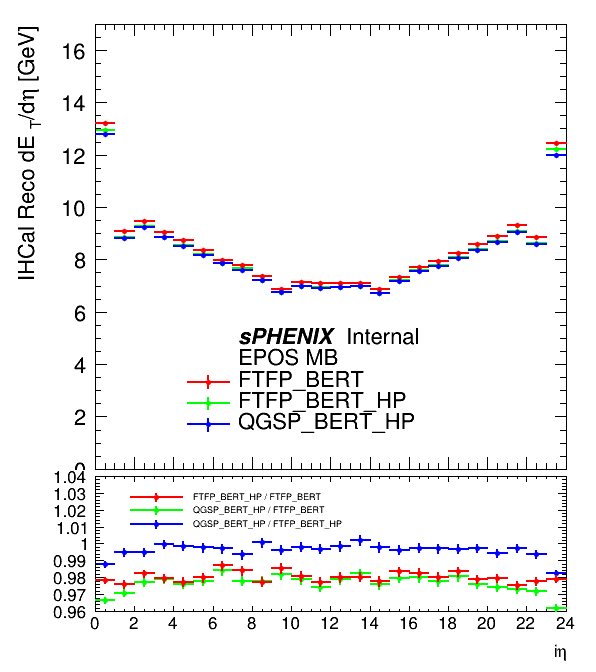

In [42]:
canvas = TCanvas("canvas","",600,700)

pad_top = ROOT.TPad("pad_top", "", 0.0, 0.28, 1.0, 1.0)
pad_top.SetBottomMargin(0.03)
pad_top.Draw()
pad_top.cd()

leg = ROOT.TLegend(.3,.1,.7,.32)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","EPOS MB","")
leg.AddEntry(h_eT_sim_ihcal,"FTFP_BERT","lep")
leg.AddEntry(h_eT_epos_ihcal,"FTFP_BERT_HP","lep")
leg.AddEntry(h_eT_ampt_ihcal,"QGSP_BERT_HP","lep")
leg.SetBorderSize(0)
h_eT_sim_ihcal.SetLineColor(2)
h_eT_ampt_ihcal.SetLineColor(4)
h_eT_epos_ihcal.SetLineColor(3)
h_eT_sim_ihcal.SetMarkerStyle(8)
h_eT_sim_ihcal.SetMarkerSize(0.7)
h_eT_sim_ihcal.SetMarkerColor(2)
h_eT_ampt_ihcal.SetMarkerStyle(8)
h_eT_ampt_ihcal.SetMarkerSize(0.7)
h_eT_ampt_ihcal.SetMarkerColor(4)
h_eT_epos_ihcal.SetMarkerStyle(8)
h_eT_epos_ihcal.SetMarkerSize(0.7)
h_eT_epos_ihcal.SetMarkerColor(3)
h_eT_epos_ihcal.GetYaxis().SetRangeUser(0,17)
h_eT_sim_ihcal.SetStats(0)
h_eT_epos_ihcal.SetStats(0)
h_eT_ampt_ihcal.SetStats(0)
h_eT_epos_ihcal.SetYTitle("IHCal Reco dE_{T}/d#eta [GeV]")
h_eT_epos_ihcal.SetXTitle("#eta")
h_eT_epos_ihcal.Draw()
h_eT_sim_ihcal.Draw('same')
h_eT_ampt_ihcal.Draw('same')
leg.Draw()

canvas.cd()
pad_bottom = ROOT.TPad("pad_bottom", "", 0.0, 0.0, 1.0, 0.3)
pad_bottom.SetTopMargin(0.03)
pad_bottom.SetBottomMargin(0.3)
pad_bottom.Draw()
pad_bottom.cd()

leg1 = ROOT.TLegend(.2,.7,.7,.9)
leg1.AddEntry(ihcal_ratio_epos,"FTFP_BERT_HP / FTFP_BERT","lep")
leg1.AddEntry(ihcal_ratio_ampt,"QGSP_BERT_HP / FTFP_BERT","lep")
leg1.AddEntry(ihcal_ratio_hp,"QGSP_BERT_HP / FTFP_BERT_HP","lep")
leg1.SetBorderSize(0)
ihcal_ratio_hp.GetXaxis().SetLabelSize(0.09)
ihcal_ratio_hp.GetYaxis().SetLabelSize(0.09)
ihcal_ratio_epos.SetLineColor(2)
ihcal_ratio_ampt.SetLineColor(3)
ihcal_ratio_hp.SetLineColor(4)
ihcal_ratio_epos.SetMarkerStyle(8)
ihcal_ratio_epos.SetMarkerSize(0.7)
ihcal_ratio_epos.SetMarkerColor(2)
ihcal_ratio_ampt.SetMarkerStyle(8)
ihcal_ratio_ampt.SetMarkerSize(0.7)
ihcal_ratio_ampt.SetMarkerColor(3)
ihcal_ratio_hp.SetMarkerStyle(8)
ihcal_ratio_hp.SetMarkerSize(0.7)
ihcal_ratio_hp.SetMarkerColor(4)
ihcal_ratio_hp.GetYaxis().SetRangeUser(0.96,1.04)
ihcal_ratio_epos.SetStats(0)
ihcal_ratio_ampt.SetStats(0)
ihcal_ratio_hp.SetYTitle("")
ihcal_ratio_hp.GetXaxis().SetTitle("i#eta")
ihcal_ratio_hp.GetXaxis().SetTitleSize(0.09)
ihcal_ratio_hp.Draw()
ihcal_ratio_ampt.Draw('same')
ihcal_ratio_epos.Draw('same')
leg1.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/ihcal_reco_w_ratio_epos_mb_phys_list_comp.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/ohcal_reco_w_ratio_epos_mb_phys_list_comp.png has been created


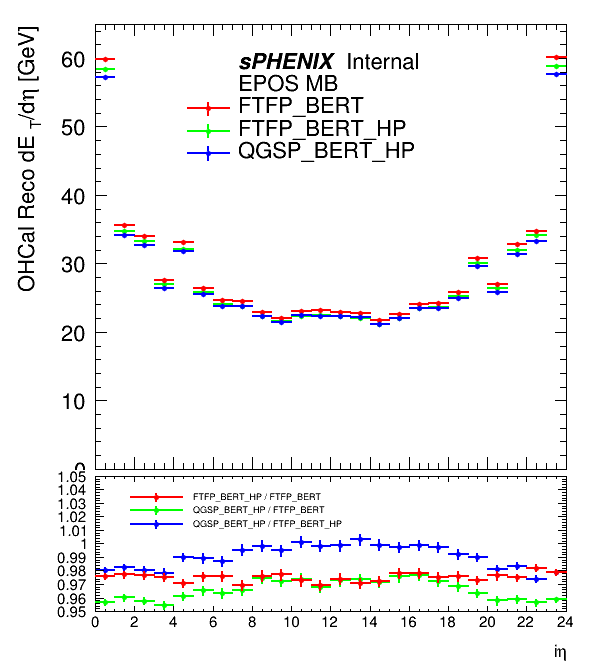

In [43]:
canvas = TCanvas("canvas","",600,700)

pad_top = ROOT.TPad("pad_top", "", 0.0, 0.28, 1.0, 1.0)
pad_top.SetBottomMargin(0.03)
pad_top.Draw()
pad_top.cd()

leg = ROOT.TLegend(.3,.66,.7,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","EPOS MB","")
leg.AddEntry(h_eT_sim_ohcal,"FTFP_BERT","lep")
leg.AddEntry(h_eT_epos_ohcal,"FTFP_BERT_HP","lep")
leg.AddEntry(h_eT_ampt_ohcal,"QGSP_BERT_HP","lep")
leg.SetBorderSize(0)
h_eT_sim_ohcal.SetLineColor(2)
h_eT_ampt_ohcal.SetLineColor(4)
h_eT_epos_ohcal.SetLineColor(3)
h_eT_sim_ohcal.SetMarkerStyle(8)
h_eT_sim_ohcal.SetMarkerSize(0.7)
h_eT_sim_ohcal.SetMarkerColor(2)
h_eT_ampt_ohcal.SetMarkerStyle(8)
h_eT_ampt_ohcal.SetMarkerSize(0.7)
h_eT_ampt_ohcal.SetMarkerColor(4)
h_eT_epos_ohcal.SetMarkerStyle(8)
h_eT_epos_ohcal.SetMarkerSize(0.7)
h_eT_epos_ohcal.SetMarkerColor(3)
h_eT_epos_ohcal.GetYaxis().SetRangeUser(0,65)
h_eT_sim_ohcal.SetStats(0)
h_eT_epos_ohcal.SetStats(0)
h_eT_ampt_ohcal.SetStats(0)
h_eT_epos_ohcal.SetYTitle("OHCal Reco dE_{T}/d#eta [GeV]")
h_eT_epos_ohcal.SetXTitle("#eta")
h_eT_epos_ohcal.Draw()
h_eT_sim_ohcal.Draw('same')
h_eT_ampt_ohcal.Draw('same')
leg.Draw()

canvas.cd()
pad_bottom = ROOT.TPad("pad_bottom", "", 0.0, 0.0, 1.0, 0.3)
pad_bottom.SetTopMargin(0.03)
pad_bottom.SetBottomMargin(0.3)
pad_bottom.Draw()
pad_bottom.cd()

leg1 = ROOT.TLegend(.2,.7,.7,.9)
leg1.AddEntry(ohcal_ratio_epos,"FTFP_BERT_HP / FTFP_BERT","lep")
leg1.AddEntry(ohcal_ratio_ampt,"QGSP_BERT_HP / FTFP_BERT","lep")
leg1.AddEntry(ohcal_ratio_hp,"QGSP_BERT_HP / FTFP_BERT_HP","lep")
leg1.SetBorderSize(0)
ohcal_ratio_hp.GetXaxis().SetLabelSize(0.08)
ohcal_ratio_hp.GetYaxis().SetLabelSize(0.08)
ohcal_ratio_epos.SetLineColor(2)
ohcal_ratio_ampt.SetLineColor(3)
ohcal_ratio_hp.SetLineColor(4)
ohcal_ratio_epos.SetMarkerStyle(8)
ohcal_ratio_epos.SetMarkerSize(0.7)
ohcal_ratio_epos.SetMarkerColor(2)
ohcal_ratio_ampt.SetMarkerStyle(8)
ohcal_ratio_ampt.SetMarkerSize(0.7)
ohcal_ratio_ampt.SetMarkerColor(3)
ohcal_ratio_hp.SetMarkerStyle(8)
ohcal_ratio_hp.SetMarkerSize(0.7)
ohcal_ratio_hp.SetMarkerColor(4)
ohcal_ratio_hp.GetYaxis().SetRangeUser(0.95,1.05)
ohcal_ratio_epos.SetStats(0)
ohcal_ratio_ampt.SetStats(0)
ohcal_ratio_hp.SetYTitle("")
ohcal_ratio_hp.GetXaxis().SetTitle("i#eta")
ohcal_ratio_hp.GetXaxis().SetTitleSize(0.09)
ohcal_ratio_hp.Draw()
ohcal_ratio_ampt.Draw('same')
ohcal_ratio_epos.Draw('same')
leg1.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/ohcal_reco_w_ratio_epos_mb_phys_list_comp.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


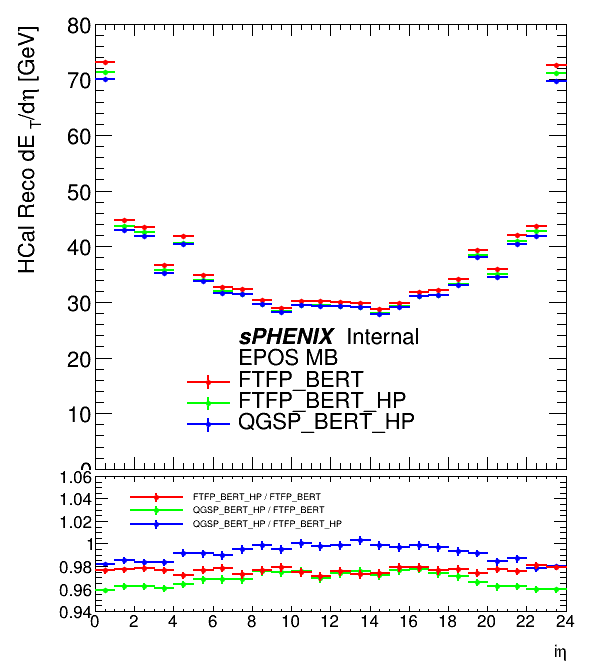

In [12]:
canvas = TCanvas("canvas","",600,700)

pad_top = ROOT.TPad("pad_top", "", 0.0, 0.28, 1.0, 1.0)
pad_top.SetBottomMargin(0.03)
pad_top.Draw()
pad_top.cd()

leg = ROOT.TLegend(.3,.1,.7,.32)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","EPOS MB","")
leg.AddEntry(h_eT_sim_hcal,"FTFP_BERT","lep")
leg.AddEntry(h_eT_epos_hcal,"FTFP_BERT_HP","lep")
leg.AddEntry(h_eT_ampt_hcal,"QGSP_BERT_HP","lep")
leg.SetBorderSize(0)
h_eT_sim_hcal.SetLineColor(2)
h_eT_ampt_hcal.SetLineColor(4)
h_eT_epos_hcal.SetLineColor(3)
h_eT_sim_hcal.SetMarkerStyle(8)
h_eT_sim_hcal.SetMarkerSize(0.7)
h_eT_sim_hcal.SetMarkerColor(2)
h_eT_ampt_hcal.SetMarkerStyle(8)
h_eT_ampt_hcal.SetMarkerSize(0.7)
h_eT_ampt_hcal.SetMarkerColor(4)
h_eT_epos_hcal.SetMarkerStyle(8)
h_eT_epos_hcal.SetMarkerSize(0.7)
h_eT_epos_hcal.SetMarkerColor(3)
h_eT_epos_hcal.GetYaxis().SetRangeUser(0,80)
h_eT_sim_hcal.SetStats(0)
h_eT_epos_hcal.SetStats(0)
h_eT_ampt_hcal.SetStats(0)
h_eT_epos_hcal.SetYTitle("HCal Reco dE_{T}/d#eta [GeV]")
h_eT_epos_hcal.SetXTitle("#eta")
h_eT_epos_hcal.Draw()
h_eT_sim_hcal.Draw('same')
h_eT_ampt_hcal.Draw('same')
leg.Draw()

canvas.cd()
pad_bottom = ROOT.TPad("pad_bottom", "", 0.0, 0.0, 1.0, 0.3)
pad_bottom.SetTopMargin(0.03)
pad_bottom.SetBottomMargin(0.3)
pad_bottom.Draw()
pad_bottom.cd()

leg1 = ROOT.TLegend(.2,.7,.7,.9)
leg1.AddEntry(hcal_ratio_epos,"FTFP_BERT_HP / FTFP_BERT","lep")
leg1.AddEntry(hcal_ratio_ampt,"QGSP_BERT_HP / FTFP_BERT","lep")
leg1.AddEntry(hcal_ratio_hp,"QGSP_BERT_HP / FTFP_BERT_HP","lep")
leg1.SetBorderSize(0)
hcal_ratio_hp.GetXaxis().SetLabelSize(0.09)
hcal_ratio_hp.GetYaxis().SetLabelSize(0.09)
hcal_ratio_epos.SetLineColor(2)
hcal_ratio_ampt.SetLineColor(3)
hcal_ratio_hp.SetLineColor(4)
hcal_ratio_epos.SetMarkerStyle(8)
hcal_ratio_epos.SetMarkerSize(0.7)
hcal_ratio_epos.SetMarkerColor(2)
hcal_ratio_ampt.SetMarkerStyle(8)
hcal_ratio_ampt.SetMarkerSize(0.7)
hcal_ratio_ampt.SetMarkerColor(3)
hcal_ratio_hp.SetMarkerStyle(8)
hcal_ratio_hp.SetMarkerSize(0.7)
hcal_ratio_hp.SetMarkerColor(4)
hcal_ratio_hp.GetYaxis().SetRangeUser(0.94,1.06)
hcal_ratio_epos.SetStats(0)
hcal_ratio_ampt.SetStats(0)
hcal_ratio_hp.SetYTitle("")
hcal_ratio_hp.GetXaxis().SetTitle("i#eta")
hcal_ratio_hp.GetXaxis().SetTitleSize(0.09)
hcal_ratio_hp.Draw()
hcal_ratio_ampt.Draw('same')
hcal_ratio_epos.Draw('same')
leg1.Draw()
canvas.Draw()
#canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/ihcal_reco_w_ratio_epos_mb_phys_list_comp.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/calo_reco_w_ratio_epos_mb_phys_list_comp.png has been created


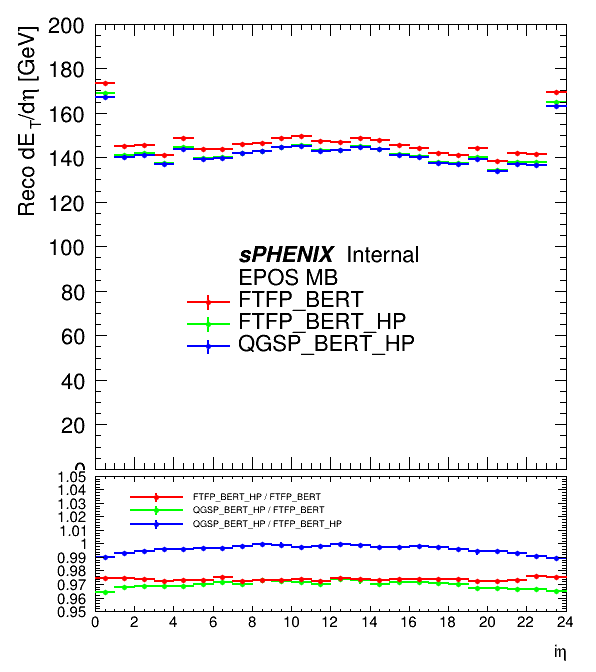

In [44]:
canvas = TCanvas("canvas","",600,700)

pad_top = ROOT.TPad("pad_top", "", 0.0, 0.28, 1.0, 1.0)
pad_top.SetBottomMargin(0.03)
pad_top.Draw()
pad_top.cd()

leg = ROOT.TLegend(.3,.26,.7,.49)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.AddEntry("","EPOS MB","")
leg.AddEntry(h_eT_sim_calo,"FTFP_BERT","lep")
leg.AddEntry(h_eT_epos_calo,"FTFP_BERT_HP","lep")
leg.AddEntry(h_eT_ampt_calo,"QGSP_BERT_HP","lep")
leg.SetBorderSize(0)
h_eT_sim_calo.SetLineColor(2)
h_eT_ampt_calo.SetLineColor(4)
h_eT_epos_calo.SetLineColor(3)
h_eT_sim_calo.SetMarkerStyle(8)
h_eT_sim_calo.SetMarkerSize(0.7)
h_eT_sim_calo.SetMarkerColor(2)
h_eT_ampt_calo.SetMarkerStyle(8)
h_eT_ampt_calo.SetMarkerSize(0.7)
h_eT_ampt_calo.SetMarkerColor(4)
h_eT_epos_calo.SetMarkerStyle(8)
h_eT_epos_calo.SetMarkerSize(0.7)
h_eT_epos_calo.SetMarkerColor(3)
h_eT_epos_calo.GetYaxis().SetRangeUser(0,200)
h_eT_sim_calo.SetStats(0)
h_eT_epos_calo.SetStats(0)
h_eT_ampt_calo.SetStats(0)
h_eT_epos_calo.SetYTitle("Reco dE_{T}/d#eta [GeV]")
h_eT_epos_calo.SetXTitle("#eta")
h_eT_epos_calo.Draw()
h_eT_sim_calo.Draw('same')
h_eT_ampt_calo.Draw('same')
leg.Draw()

canvas.cd()
pad_bottom = ROOT.TPad("pad_bottom", "", 0.0, 0.0, 1.0, 0.3)
pad_bottom.SetTopMargin(0.03)
pad_bottom.SetBottomMargin(0.3)
pad_bottom.Draw()
pad_bottom.cd()

leg1 = ROOT.TLegend(.2,.7,.7,.9)
leg1.AddEntry(calo_ratio_epos,"FTFP_BERT_HP / FTFP_BERT","lep")
leg1.AddEntry(calo_ratio_ampt,"QGSP_BERT_HP / FTFP_BERT","lep")
leg1.AddEntry(calo_ratio_hp,"QGSP_BERT_HP / FTFP_BERT_HP","lep")
leg1.SetBorderSize(0)
calo_ratio_hp.GetXaxis().SetLabelSize(0.08)
calo_ratio_hp.GetYaxis().SetLabelSize(0.08)
calo_ratio_epos.SetLineColor(2)
calo_ratio_ampt.SetLineColor(3)
calo_ratio_hp.SetLineColor(4)
calo_ratio_epos.SetMarkerStyle(8)
calo_ratio_epos.SetMarkerSize(0.7)
calo_ratio_epos.SetMarkerColor(2)
calo_ratio_ampt.SetMarkerStyle(8)
calo_ratio_ampt.SetMarkerSize(0.7)
calo_ratio_ampt.SetMarkerColor(3)
calo_ratio_hp.SetMarkerStyle(8)
calo_ratio_hp.SetMarkerSize(0.7)
calo_ratio_hp.SetMarkerColor(4)
calo_ratio_hp.GetYaxis().SetRangeUser(0.95,1.05)
calo_ratio_epos.SetStats(0)
calo_ratio_ampt.SetStats(0)
calo_ratio_hp.SetYTitle("")
calo_ratio_hp.GetXaxis().SetTitle("i#eta")
calo_ratio_hp.GetXaxis().SetTitleSize(0.09)
calo_ratio_hp.Draw()
calo_ratio_ampt.Draw('same')
calo_ratio_epos.Draw('same')
leg1.Draw()
canvas.Draw()
canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/calo_reco_w_ratio_epos_mb_phys_list_comp.png')

In [13]:
exfile = ROOT.TFile.Open('../runs23727_23746/MC/dETdeta_variation_MC_0-5.root')
emcal_detdeta_ex = TH1F(exfile.Get("emcal_detdeta_dev"))
ihcal_detdeta_ex = TH1F(exfile.Get("ihcal_detdeta_dev"))
ohcal_detdeta_ex = TH1F(exfile.Get("ohcal_detdeta_dev"))
calo_detdeta_ex = TH1F(exfile.Get("ihcal_detdeta_dev"))
hcal_detdeta_ex = TH1F(exfile.Get("ihcal_detdeta_dev"))
emcal_detdeta_ex.SetDirectory(0)
ihcal_detdeta_ex.SetDirectory(0)
ohcal_detdeta_ex.SetDirectory(0)
calo_detdeta_ex.SetDirectory(0)
hcal_detdeta_ex.SetDirectory(0)
exfile.Close()
emcal_detdeta_var = TH1F(emcal_detdeta_ex.Clone("emcal_detdeta_var"))
ihcal_detdeta_var = TH1F(ihcal_detdeta_ex.Clone("ihcal_detdeta_var"))
ohcal_detdeta_var = TH1F(ohcal_detdeta_ex.Clone("ohcal_detdeta_var"))
calo_detdeta_var = TH1F(calo_detdeta_ex.Clone("calo_detdeta_var"))
hcal_detdeta_var = TH1F(hcal_detdeta_ex.Clone("hcal_detdeta_var"))
for j in range(1, emcal_detdeta_var.GetNbinsX() + 1):
    emcal_detdeta_var.SetBinContent(j, 1-emcal_ratio_ampt.GetBinContent(j))
    ihcal_detdeta_var.SetBinContent(j, 1-ihcal_ratio_ampt.GetBinContent(j))
    ohcal_detdeta_var.SetBinContent(j, 1-ohcal_ratio_ampt.GetBinContent(j))
    calo_detdeta_var.SetBinContent(j, 1-calo_ratio_ampt.GetBinContent(j))
    hcal_detdeta_var.SetBinContent(j, 1-hcal_ratio_ampt.GetBinContent(j))

In [14]:
cents = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60']
emcal_avg = {'0-5':682.96, '5-10':576.80, '10-20':433.72, '20-30':288.89, '30-40':186.11, '40-50':114.86, '50-60':67.30}
ihcal_avg = {'0-5':740.09, '5-10':619.46, '10-20':465.05, '20-30':312.43, '30-40':204.59, '40-50':127.68, '50-60':75.44}
ohcal_avg = {'0-5':664.84, '5-10':555.44, '10-20':415.52, '20-30':277.10, '30-40':180.06, '40-50':111.44, '50-60':65.18}
calo_avg = {'0-5':680.94, '5-10':578.40, '10-20':432.17, '20-30':289.55, '30-40':187.18, '40-50':115.24, '50-60':67.37}
hcal_avg = {'0-5':688.03, '5-10':575.06, '10-20':430.49, '20-30':287.56, '30-40':187.22, '40-50':116.01, '50-60':68.05}
for i, cent in enumerate(cents):
    outfile = ROOT.TFile.Open('dETdeta_variation_phys_list_w_hcal_'+cent+'.root',"RECREATE")
    emcal_detdeta_dev = TH1F(emcal_detdeta_var.Clone("emcal_detdeta_dev"))
    ihcal_detdeta_dev = TH1F(ihcal_detdeta_var.Clone("ihcal_detdeta_dev"))
    ohcal_detdeta_dev = TH1F(ohcal_detdeta_var.Clone("ohcal_detdeta_dev"))
    calo_detdeta_dev = TH1F(calo_detdeta_var.Clone("calo_detdeta_dev"))
    hcal_detdeta_dev = TH1F(hcal_detdeta_var.Clone("hcal_detdeta_dev"))
    emcal_detdeta_dev.Scale(emcal_avg[cent])
    ihcal_detdeta_dev.Scale(ihcal_avg[cent])
    ohcal_detdeta_dev.Scale(ohcal_avg[cent])
    calo_detdeta_dev.Scale(calo_avg[cent])
    hcal_detdeta_dev.Scale(hcal_avg[cent])
    emcal_detdeta_dev.Write()
    ihcal_detdeta_dev.Write()
    ohcal_detdeta_dev.Write()
    calo_detdeta_dev.Write()
    hcal_detdeta_dev.Write()
    outfile.Write()
    outfile.Close()  

In [15]:
for i in range(1,hcal_detdeta_var.GetNbinsX() + 1):
    print(hcal_detdeta_var.GetBinContent(i))

0.04150968790054321
0.03766810894012451
0.03808718919754028
0.03969818353652954
0.035873591899871826
0.03180617094039917
0.031688570976257324
0.03173947334289551
0.024480879306793213
0.025464773178100586
0.02483600378036499
0.030714035034179688
0.025875866413116455
0.024175822734832764
0.027596116065979004
0.023365676403045654
0.022331416606903076
0.026416242122650146
0.0288124680519104
0.03409290313720703
0.03805685043334961
0.0378718376159668
0.040557026863098145
0.04078245162963867
